In [1]:
using PyPlot

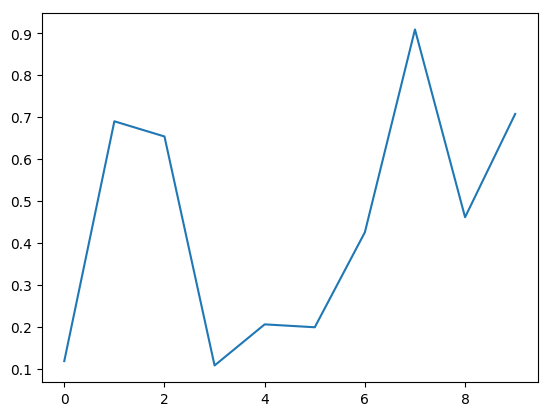

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6df0ff63d0>

In [2]:
plot(rand(10))

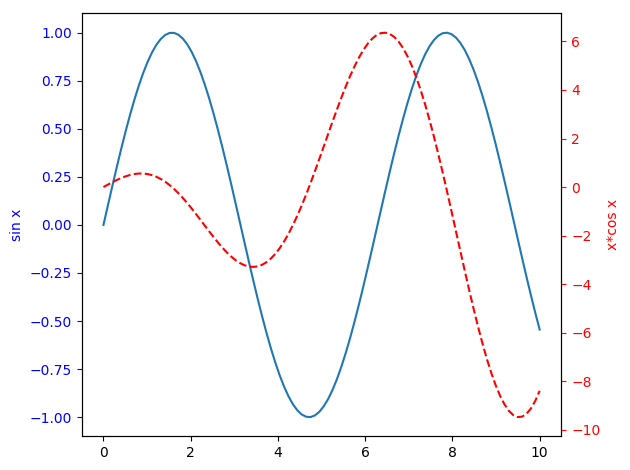

In [16]:
fig, ax1 = subplots()
x = linspace(0,10,100)
ax1[:plot](x, sin.(x))
ax1[:set_ylabel]("sin x", color="b")
ax1[:tick_params]("y", colors = "b")

ax2 = ax1[:twinx]()
ax2[:plot](x, x.*cos.(x), "--r")
ax2[:set_ylabel]("x*cos x", color="r")
ax2[:tick_params]("y", colors = "r")

tight_layout()


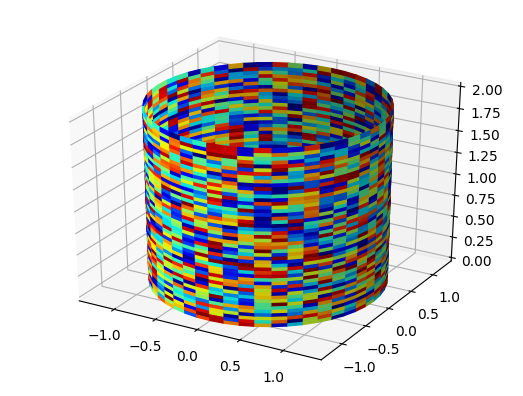

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7f6dcbd56050>

In [44]:
fig = figure()
ax = fig[:add_subplot](111, projection = "3d")
r = linspace(1.25, 1.25, 50)
p = linspace(0, 2π, 50)
R = repmat(r, 1, 50)
P = repmat(p', 50, 1)
Zc = rand(50, 50) # (P.^2-1).^2
Z = repmat(linspace(0, 2, 50), 1, 50)
X, Y = R.*cos.(P), R.*sin.(P)
ax[:plot_surface](X, Y, Z, facecolors=PyPlot.cm[:jet](Zc/maximum(Zc)))

In [42]:
sum(Zc)

739212.2412095095